In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [4]:
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT361w2chip4_BF_20241010\S21\Power/'
df = S21.loop_over_S21_files(dir, kid=None, pread=110)
display(df)

c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)


,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr
0,100,-110.0,0.099981,5.142998,1.101161e-07,42688.293507,74.653635,46808.750894,118.866569,484942.691856,12718.024937,-69.068593,0.000025
1,101,-110.0,0.099994,5.166022,1.259783e-07,53856.736987,136.184590,58604.666903,212.638308,664764.684268,27396.682669,-68.026020,0.000037
2,102,-110.0,0.099914,5.178915,1.015762e-07,56801.311088,122.227815,62416.222341,188.141230,631412.163498,19353.484661,-67.837306,0.000028
3,103,-110.0,0.099970,5.188296,1.140851e-07,42540.630900,75.198790,40295.085220,135.952674,-763368.281689,35080.442532,-68.447941,0.000022
4,104,-110.0,0.100029,5.202942,1.278179e-07,25172.169177,28.158485,24224.851445,54.241814,-643703.836859,28781.437940,-70.795697,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,96,-110.0,0.099963,5.115245,1.403163e-07,51898.584814,140.817894,57285.170286,193.129270,551930.213372,18059.351629,-68.248811,0.000040
385,97,-110.0,0.099971,5.116466,1.094988e-07,43100.611135,75.205369,40876.714365,136.418043,-792218.143470,36856.791342,-68.396590,0.000021
386,98,-110.0,0.100067,5.122221,8.415240e-08,47414.774476,70.075595,50727.134360,106.509225,726133.548230,21716.437934,-68.505628,0.000014
387,99,-110.0,0.099998,5.135109,1.079319e-07,49666.461597,99.223032,46887.612952,181.056065,-838023.989749,42032.159588,-67.760816,0.000026


In [5]:
def fit(x, a, b):
    return a*x**(-2)+b 

118
975236.6308698234 17302.12713008844


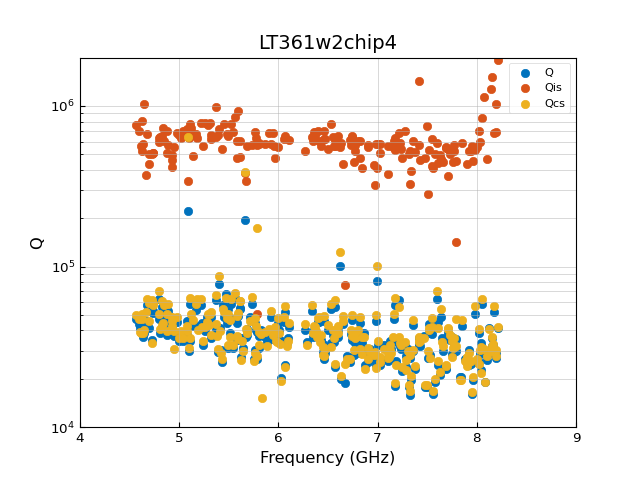

In [12]:
f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])

min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots()
ax.set_title('LT361w2chip4')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qis')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qcs')
# ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e4, 2e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)

Text(0, 0.5, 'Length coupler (um)')

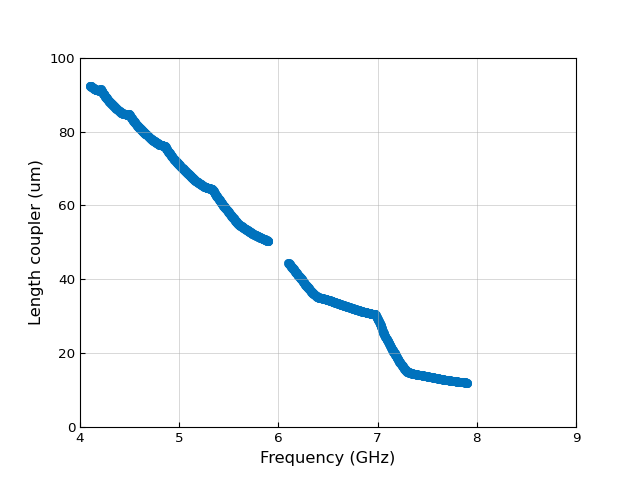

In [56]:
couplers = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_couplers.npy')
f0s_design = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_F0s.npy')*1e-9
fig, ax = plt.subplots()
ax.scatter(f0s_design, couplers)
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, 100)
ax.set_ylabel('Length coupler (um)')